# Proyecto 4: Redes Sociales

## Integrantes:


- García Saavedra Armando
- Orozco Guillen Jorge David
- Rodriguez Nuñez Diego Eduardo

### Primero importamos las librerias necesarias 

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Después leemos los archivos de instagram

In [252]:
i_d = pd.read_csv('socialnetworks\Insta_dec.csv')
i_d = (
    i_d
    .assign(
        Month = 'December'
    )
    .rename(columns={
        "Eng. (Auth.)": "Authentic",
        "Eng. (Avg.)": "Engagement",
        "name": "Username",
        "instagram name": "Name",
        "country": "Country",
        "Category_1":"Category1",
        "Category_2":"Category2",
        "followers": "Subscribers o Followers"
    })
    .drop(columns=['Rank'])
)
i_d

,Username,Name,Category1,Category2,Subscribers o Followers,Country,Authentic,Engagement,Month
0,leomessi,Leo Messi,Sports with a ball,Family,409.8M,Argentina,17.8M,23.4M,December
1,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,523M,India,11.7M,14.7M,December
2,neymarjr,NJ 🇧🇷,Sports with a ball,NaN,198.9M,Brazil,6.7M,9.5M,December
3,kyliejenner,Kylie 🤍,Fashion,Modeling,376.3M,United States,2.7M,4.3M,December
4,kendalljenner,Kendall,Modeling,Fashion,268M,United States,3.2M,5M,December
...,...,...,...,...,...,...,...,...,...
995,thiago6,Thiago Alcantara,Sports with a ball,NaN,10.4M,United Kingdom,129.9K,222.7K,December
996,soycintiacossio,Cintia Cossio,Modeling,Adult content,6M,Colombia,313.4K,390.6K,December
997,feat.dino,이찬,Lifestyle,NaN,2.7M,South Korea,716.6K,876.4K,December
998,djokernole,Novak Djokovic,Sports with a ball,NaN,11.8M,United States,158.6K,197.5K,December


In [253]:
i_j = pd.read_csv('socialnetworks\Insta_june.csv')
i_j = (
    i_j
    .assign(
        Month = 'June'
    )
    .rename(columns={
        "instagram name": "Username",
        "influencer name ": "Name",
        "Category_1":"Category1",
        "Category_2":"Category2",
        "Subscribers count":"Subscribers o Followers",
        "Views avg.": "Country",
        "Likes avg": "Authentic",
        "Comments avg.": "Engagement"
    })
)
i_j

,Username,Name,Category1,Category2,Subscribers o Followers,Country,Authentic,Engagement,Month
0,433,433,Sports with a ball,NaN,50.7M,Spain,274.9K,456.7K,June
1,____kimwoobin,김우빈,Lifestyle,NaN,3.6M,Indonesia,449.4K,592.7K,June
2,__youngbae__,TAEYANG,Music,NaN,13.4M,Indonesia,269.6K,304.1K,June
3,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.6M,Russia,164.4K,189.4K,June
4,_hakkencoser_,Hakken 八犬,Lifestyle,Photography,3.5M,United States,525.1K,643K,June
...,...,...,...,...,...,...,...,...,...
1017,zidane,zidane,Sports with a ball,NaN,33M,Spain,412.4K,560.8K,June
1018,zidane,zidane,Sports with a ball,NaN,33M,Spain,412.4K,560.8K,June
1019,zkdlin,KAI,Music,NaN,14.1M,Indonesia,1.4M,1.7M,June
1020,zo,Lonzo Ball,Sports with a ball,NaN,14M,United States,145.8K,262K,June


In [254]:
i_n = pd.read_csv('socialnetworks\Insta_nov.csv')
i_n = (
    i_n
    .assign(
        Month = 'November'
    )
    .rename(columns={
        "Name":"Username",
        "Instagram Name": "Name",
        "Category-1":"Category1",
        "Category-2":"Category2",
        "Followers":"Subscribers o Followers",
        "\nCountry": "Country",
        "Eng. (Auth.)": "Authentic",
        "Eng. (Avg.)": "Engagement"
    })
    .drop(columns=['s.no'])
)
i_n

,Username,Name,Category1,Subscribers o Followers,Country,Authentic,Engagement,Category2,Month
0,cristiano,Cristiano Ronaldo,Sports with a ball,483.1M,India,4.5M,5.6M,NaN,November
1,kyliejenner,Kylie 🤍,Fashion,370M,United States,2.8M,4.4M,Modeling,November
2,leomessi,Leo Messi,Sports with a ball,357.8M,Indonesia,3.2M,4.1M,Family,November
3,arianagrande,Ariana Grande,Music,331.6M,United States,2.9M,4M,NaN,November
4,zendaya,Zendaya,Cinema & Actors/actresses,152.2M,United States,4.8M,6.5M,Fashion,November
...,...,...,...,...,...,...,...,...,...
995,thenewclassic,Iggy Azalea,Music,16.7M,United States,82.1K,132.8K,NaN,November
996,min.nicha,MINNIE,Lifestyle,4.2M,Thailand,385.5K,526.6K,Music,November
997,francety,Francia James,Adult content,11.4M,India,149.9K,196.6K,NaN,November
998,silambarasantrofficial,Silambarasan TR,Shows,10.2M,India,169.6K,216.6K,Lifestyle,November


In [255]:
i_s = pd.read_csv('socialnetworks\Insta_sep.csv')
i_s = (
    i_s
    .assign(
        Month = 'September'
    )
    .rename(columns={
        "Instagram name": "Username",
        " Name": "Name",
        "Category_1":"Category1",
        "Category_2":"Category2",
        "Subscribers":"Subscribers o Followers",
        "Audience country": "Country",
        "Authentic engagement\n": "Authentic",
        "Engagement average\r\n": "Engagement"
    })
    .drop(columns=['S.no'])
)
i_s

,Username,Name,Subscribers o Followers,Country,Authentic,Engagement,Category1,Category2,Month
0,cristiano,Cristiano Ronaldo,477.9M,India,5M,6.2M,Sports with a ball,NaN,September
1,kyliejenner,Kylie 🤍,368.1M,United States,3.5M,5.5M,Fashion,Modeling,September
2,arianagrande,Ariana Grande,329.6M,United States,2.9M,4M,NaN,NaN,September
3,leomessi,Leo Messi,358.6M,Indonesia,2.7M,3.5M,Sports with a ball,Family,September
4,zendaya,Zendaya,151.1M,United States,4.3M,5.8M,Cinema & Actors/actresses,Fashion,September
...,...,...,...,...,...,...,...,...,...
1045,jadethirlwall,jade amelia thirlwall,9.4M,United States,174.2K,228.1K,NaN,NaN,September
1046,ninja,User Not Found,12.9M,United States,127.8K,163.9K,Computers & Gadgets,Machinery & Technologies,September
1047,myriamfares,Myriam Fares,20.6M,Iraq,75.8K,102.4K,NaN,NaN,September
1048,optimushwang,황민현,4.2M,South Korea,426K,508K,Lifestyle,NaN,September


### Concatenamos los 4 archivos leídos dentro de un solo DataFrame

In [256]:
df_insta = pd.concat([i_d,i_j,i_n,i_s],ignore_index=True)
df_insta

,Username,Name,Category1,Category2,Subscribers o Followers,Country,Authentic,Engagement,Month
0,leomessi,Leo Messi,Sports with a ball,Family,409.8M,Argentina,17.8M,23.4M,December
1,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,523M,India,11.7M,14.7M,December
2,neymarjr,NJ 🇧🇷,Sports with a ball,NaN,198.9M,Brazil,6.7M,9.5M,December
3,kyliejenner,Kylie 🤍,Fashion,Modeling,376.3M,United States,2.7M,4.3M,December
4,kendalljenner,Kendall,Modeling,Fashion,268M,United States,3.2M,5M,December
...,...,...,...,...,...,...,...,...,...
4067,jadethirlwall,jade amelia thirlwall,NaN,NaN,9.4M,United States,174.2K,228.1K,September
4068,ninja,User Not Found,Computers & Gadgets,Machinery & Technologies,12.9M,United States,127.8K,163.9K,September
4069,myriamfares,Myriam Fares,NaN,NaN,20.6M,Iraq,75.8K,102.4K,September
4070,optimushwang,황민현,Lifestyle,NaN,4.2M,South Korea,426K,508K,September


Eliminamos los duplicados de la columna "Username" del DataFrame anterior y creamos una copia llamada "tam" que contiene todas las cuentas sin repeticiones

In [257]:
duplicadosnt = df_insta.drop_duplicates(subset=['Username'], keep='first')
tam = duplicadosnt.copy()
tam.shape

(1384, 9)

Podemos observar que tam contiene 1384 filas, lo que significa que hay 1384 cuentas únicas y 2688 repeticiones.

In [258]:
tam

,Username,Name,Category1,Category2,Subscribers o Followers,Country,Authentic,Engagement,Month
0,leomessi,Leo Messi,Sports with a ball,Family,409.8M,Argentina,17.8M,23.4M,December
1,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,523M,India,11.7M,14.7M,December
2,neymarjr,NJ 🇧🇷,Sports with a ball,NaN,198.9M,Brazil,6.7M,9.5M,December
3,kyliejenner,Kylie 🤍,Fashion,Modeling,376.3M,United States,2.7M,4.3M,December
4,kendalljenner,Kendall,Modeling,Fashion,268M,United States,3.2M,5M,December
...,...,...,...,...,...,...,...,...,...
4005,bighit_exhibition,2022 BTS EXHIBITION : Proof,NaN,NaN,5.6M,Indonesia,310.3K,384.6K,September
4006,mario_houses,Mario Casas,Modeling,Cinema & Actors/actresses,7M,Spain,210.1K,311K,September
4012,naisaalifiayuriza,Naisa Alifia Yuriza,Lifestyle,NaN,9.9M,Indonesia,194.9K,218.3K,September
4015,leosantana,O GIGANTE,NaN,NaN,17.9M,Brazil,63.7K,119.5K,September


Calculamos los promedios de Subscribers, Authentic y Engagement de cada cuenta considerando las repeticiones encontradas y guardamos los resultados en un nuevo DataFrame llamado "Promedios". Antes de hacer esto, comprobé que no hubiera valores nulos,vacíos, N/A o 0. Otra vez se observa que es un df de 1384 filas por lo que hasta ahorita todo parece estar correcto.

In [259]:
columnas = ['Subscribers o Followers', 'Authentic', 'Engagement']
for columna in columnas:
    df_insta[columna] = (df_insta[columna]
                        .str.replace('M', '')
                        .str.replace('K', '')
                        .astype(float)
                        .mul(df_insta[columna]
                        .str.extract('([MK])')[0]
                        .map({'M': 1e6, 'K': 1e3}))
                        )
promedios_list = []
for username in df_insta["Username"].unique():
    creoquefilas = df_insta[df_insta["Username"] == username]
    subscribers = np.sum(creoquefilas["Subscribers o Followers"])
    authentic = np.sum(creoquefilas["Authentic"])
    engagement = np.sum(creoquefilas["Engagement"])
    reps = len(creoquefilas)
    promedio_subscribers = np.divide(subscribers, reps)
    promedio_authentic = np.divide(authentic, reps)
    promedio_engagement = np.divide(engagement, reps)
    pais = creoquefilas["Country"].values[0]
    promedios_list.append({'Username': username,
                           'Promedio Subscribers': promedio_subscribers,
                           'Promedio Authentic': promedio_authentic,
                           'Promedio Engagement': promedio_engagement,
                           'País': pais})
promedios = pd.DataFrame(promedios_list)
promedios

,Username,Promedio Subscribers,Promedio Authentic,Promedio Engagement,País
0,leomessi,366975000.0,7100000.0,9325000.0,Argentina
1,cristiano,485800000.0,6575000.0,8175000.0,India
2,neymarjr,182875000.0,2775000.0,3950000.0,Brazil
3,kyliejenner,366775000.0,2950000.0,4700000.0,United States
4,kendalljenner,256575000.0,1869600.0,2950000.0,United States
...,...,...,...,...,...
1379,bighit_exhibition,5600000.0,310300.0,384600.0,Indonesia
1380,mario_houses,7000000.0,210100.0,311000.0,Spain
1381,naisaalifiayuriza,9900000.0,194900.0,218300.0,Indonesia
1382,leosantana,17900000.0,63700.0,119500.0,Brazil


Posteriormente calculamos la métrica de valor de cada cuenta dividiendo el promedio de engagement sobre el promedio de seguidores de cada cuenta.

In [261]:
promedios["Métrica de Valor"] = promedios['Promedio Engagement'] / promedios['Promedio Subscribers']
promedios

,Username,Promedio Subscribers,Promedio Authentic,Promedio Engagement,País,Métrica de Valor
0,leomessi,366975000.0,7100000.0,9325000.0,Argentina,0.025410
1,cristiano,485800000.0,6575000.0,8175000.0,India,0.016828
2,neymarjr,182875000.0,2775000.0,3950000.0,Brazil,0.021599
3,kyliejenner,366775000.0,2950000.0,4700000.0,United States,0.012814
4,kendalljenner,256575000.0,1869600.0,2950000.0,United States,0.011498
...,...,...,...,...,...,...
1379,bighit_exhibition,5600000.0,310300.0,384600.0,Indonesia,0.068679
1380,mario_houses,7000000.0,210100.0,311000.0,Spain,0.044429
1381,naisaalifiayuriza,9900000.0,194900.0,218300.0,Indonesia,0.022051
1382,leosantana,17900000.0,63700.0,119500.0,Brazil,0.006676


Esta solamente es una funcion que calcula el numero de Usernames repetidos dentro de df_insta, el número de repeticiones de cada Username. 

In [262]:
def ocurrencias(df):
    duplicados = df['Username'].duplicated()
    total_repeticiones = duplicados.sum()
    if total_repeticiones == 0:
        print("No se encontraron usernames duplicados en el DataFrame.")
    else:
        print(f"Total de repeticiones en el DataFrame: {total_repeticiones}")
        ocurrencias = df[duplicados]['Username'].value_counts()
        for username, ocurrencia in ocurrencias.items():
            indices = df[df['Username'] == username].index.tolist()
            print(f"Username: {username}, Repeticiones: {ocurrencia + 1}, Índices: {indices}")

Se observa que efectivamente hay 2688 repeticiones dentro de df_insta.

In [263]:
ocurrencias(df_insta)

Total de repeticiones en el DataFrame: 2688
Username: brfootball, Repeticiones: 6, Índices: [607, 1139, 2732, 3708, 3996, 4046]
Username: francety, Repeticiones: 6, Índices: [949, 953, 1303, 3019, 4013, 4063]
Username: manurios, Repeticiones: 5, Índices: [345, 1606, 1607, 2301, 3326]
Username: liluzivert, Repeticiones: 5, Índices: [198, 1561, 1562, 2243, 3289]
Username: phoebejtonkin, Repeticiones: 5, Índices: [941, 1740, 2694, 3585, 3678]
Username: malutrevejo, Repeticiones: 5, Índices: [619, 1601, 1602, 2674, 3631]
Username: i_nivethathomas, Repeticiones: 5, Índices: [740, 1374, 1375, 2904, 3823]
Username: thiagosilva, Repeticiones: 5, Índices: [428, 1918, 1919, 2830, 3911]
Username: arishfakhan138, Repeticiones: 5, Índices: [589, 1091, 1092, 2868, 3727]
Username: toni.kr8s, Repeticiones: 5, Índices: [466, 1931, 2485, 3370, 3376]
Username: valeyellow46, Repeticiones: 5, Índices: [717, 1945, 2858, 4007, 4057]
Username: sureshraina3, Repeticiones: 5, Índices: [646, 1884, 2344, 3371, 33

Aquí nomás agarré un usuario al azar pa ver que sí jalara bien la función e imprimiera correctamente tanto los índices como el número de repeticiones y sí tabien.

In [264]:
indice = df_insta[df_insta['Username']=='silambarasantrofficial']
indice

,Username,Name,Category1,Category2,Subscribers o Followers,Country,Authentic,Engagement,Month
3020,silambarasantrofficial,Silambarasan TR,Shows,Lifestyle,10200000.0,India,169600.0,216600.0,November
3984,silambarasantrofficial,Silambarasan TR,Shows,Lifestyle,10200000.0,India,169600.0,216600.0,September
4034,silambarasantrofficial,Silambarasan TR,Shows,Lifestyle,10200000.0,India,169600.0,216600.0,September


Procedemos a graficar el numero de cuentas que empiezan con un alguna letra del abecedario y el numero de cuentas que no empiezan con una letra del abecedario. 


In [265]:
def graficar_histograma(df):
    df_cleaned = df.dropna(subset=['Username'])
    usernames_letra = df_cleaned[df_cleaned['Username'].str[0].str.isalpha()]['Username']
    usernames_sin_letra = df_cleaned[~df_cleaned['Username'].str[0].str.isalpha()]['Username']
    categorias = ['Letra','Sin letra']
    counts = [len(usernames_letra), len(usernames_sin_letra)]
    sns.set(style='ticks', palette='pastel')
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=categorias, y=counts)
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad de usernames')
    plt.title('Distribución de usernames por categoría')
    for i, count in enumerate(counts):
        ax.text(i, count, str(count), ha='center', va='bottom')
    plt.show()

Observamos que de los 4072 registros del DataFrame (sin eliminar duplicados, obviamente) 4000 cuentas comienzan con una letra del abecedario mientras que 72 no.

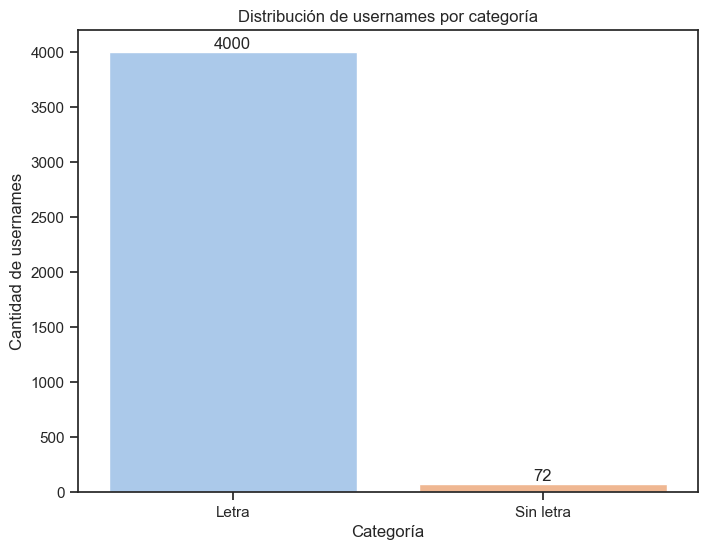

In [266]:
graficar_histograma(df_insta)

Aquí imprimimos en una lista todas las cuentas que no inician con una letra del alfabeto y se comprueba que efectivamente son 72.

In [267]:
usernames_sin_letra = df_insta[~df_insta['Username'].str[0].str.isalpha()]['Username']
print("Usernames que no comienzan con una letra del alfabeto:")
print(usernames_sin_letra.tolist())
num_elementos_usernames_sin_letra = len(usernames_sin_letra)
print("Número de elementos en usernames_sin_letra:", num_elementos_usernames_sin_letra)

Usernames que no comienzan con una letra del alfabeto:
['6ix9ine', '433', '_jeongjaehyun', '_rl9', '9gag', '_zyozyo', '_imyour_joy', '_mariahwasa', '21savage', '7_luhan_m', '_seorina', '_shotaroo_', '_chaechae_1', '_yujin_an', '333cyj333', '_hakkencoser_', '_agentgirl_', '433', '____kimwoobin', '__youngbae__', '_agentgirl_', '_hakkencoser_', '_hakkencoser_', '_imyour_joy', '_jeongjaehyun', '_mariahwasa', '_rl9', '_seorina', '_shotaroo_', '_zyozyo', '03_hu', '21savage', '39saku_chan', '3gerardpique', '5sos', '9gag', '433', '_rl9', '_jeongjaehyun', '_imyour_joy', '_zyozyo', '_mariahwasa', '9gag', '_seorina', '__youngbae__', '7_luhan_m', '39saku_chan', '_shotaroo_', '5.min.crafts', '_schwim_', '21savage', '_abu_saalim_', '_chaechae_1', '333cyj333', '____kimwoobin', '03_hu', '_hakkencoser_', '_rl9', '433', '_jeongjaehyun', '_zyozyo', '_imyour_joy', '9gag', '_mariahwasa', '_seorina', '__youngbae__', '39saku_chan', '21savage', '_abu_saalim_', '_irishbella_', '_chaechae_1', '_hakkencoser_']
N

Después calculamos el numero de cuentas las cuales ya sea su **USERNAME O NAME** inicien con la primer letra del primer nombre de los integrantes del equipo (A, D, J) dentro del DataFrame concatenado, eliminamos los usernames y names duplicados y convertimos todo a minúsculas para que no haya falla. Observamos que hay 344 cuentas que cumplen con la condición.

In [268]:
iniciales = df_insta[(df_insta['Username'].str.lower().str.startswith(('a', 'd', 'j'))) | (df_insta['Name'].str.lower().str.startswith(('a', 'd','j'))) ].drop_duplicates(subset=['Username', 'Name']).dropna(subset=['Username','Name'])
iniciales

,Username,Name,Category1,Category2,Subscribers o Followers,Country,Authentic,Engagement,Month
5,arianagrande,Ariana Grande,Music,NaN,345900000.0,United States,2500000.0,3400000.0,December
15,agustd,SUGA of BTS 민윤기,Lifestyle,Music,41400000.0,NaN,9500000.0,9500000.0,December
16,justinbieber,Justin Bieber,Music,NaN,270000000.0,Brazil,1000000.0,1400000.0,December
17,jennierubyjane,J,Music,NaN,72300000.0,Indonesia,4400000.0,5200000.0,December
18,therock,Dwayne Johnson,Fitness & Gym,Art/Artists,355200000.0,India,761200.0,976300.0,December
...,...,...,...,...,...,...,...,...,...
3876,dukeandduchessofcambridge,Duke and Duchess of Cambridge,Family,Finance & Economics,13900000.0,United States,147100.0,187900.0,September
3893,dorra_zarrouk,DORRA درة.,Cinema & Actors/actresses,Fashion,15900000.0,Egypt,118200.0,158800.0,September
3955,gun_atthaphan,ATp,Lifestyle,NaN,5600000.0,Indonesia,349300.0,418100.0,September
3967,juliabarretto,Julia,Cinema & Actors/actresses,Lifestyle,11200000.0,Philippines,159300.0,203700.0,September


Aquí calculamos cuál es el username que contiene más caracteres dentro del DataFrame

In [269]:
mas_chars = df_insta.loc[df_insta['Username'].str.len().idxmax(), 'Username']
print("Username más largo:", mas_chars)
print("Longitud:", len(mas_chars))

Username más largo: jungkook_bighitentertainment
Longitud: 28


Procedemos a crear una serie con todos los países.

In [270]:
serie_paises2 = promedios.groupby('País')['Promedio Subscribers'].mean()
serie_paises2 = serie_paises2[serie_paises2.index.str.match(r'^[a-zA-Z\s]+$')]
serie_paises2

País
Albania                 1.050000e+07
Algeria                 9.275000e+06
Argentina               2.467528e+07
Australia               9.650000e+06
Brazil                  2.284064e+07
Chile                   1.455000e+07
China                   1.344444e+07
Colombia                1.274808e+07
Egypt                   1.841042e+07
Ethiopia                3.880000e+07
France                  2.835556e+07
Germany                 1.730190e+07
India                   2.960075e+07
Indonesia               1.630174e+07
Iran                    1.034549e+07
Iraq                    1.467130e+07
Italy                   1.534062e+07
Japan                   6.000000e+06
Kazakhstan              7.000000e+06
Mexico                  1.555097e+07
Morocco                 8.081250e+06
Nigeria                 1.517083e+07
Pakistan                7.650000e+06
Philippines             1.151167e+07
Poland                  2.940000e+07
Portugal                1.270000e+07
Romania                 4.700000e

Y graficamos los resultados.

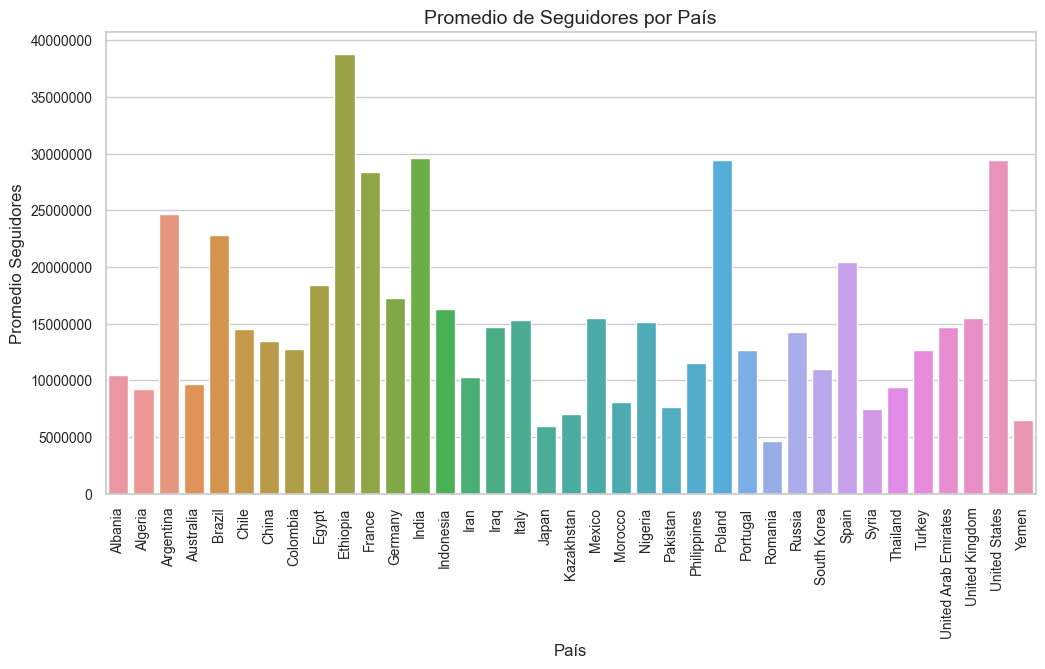

In [271]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=serie_paises2.index, y=serie_paises2.values)
plt.xlabel('País', fontsize=12)
plt.ylabel('Promedio Seguidores', fontsize=12)
plt.title('Promedio de Seguidores por País', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

***
### Ahora para tiktok

In [272]:
t_d = pd.read_csv('socialnetworks/Tiktok_dec.csv')
t_d = (
    t_d
    .assign(
        Month = 'December'
    )
    .rename(columns={
        "views(avg)": "Views",
        "likes(avg.)": "Likes",
        "Tiktoker name": "Username",
        "Tiktok name": "Name",
        "comments(avg.)": "Comments",
        "followers": "Subscribers o Followers",
        "shares(avg.)":"Shares"
    })
    .drop(columns=['Rank'])
)
t_d

,Username,Name,Subscribers o Followers,Views,Likes,Comments,Shares,Month
0,mrbeast,MrBeast,60.3M,29.2M,3.5M,30.8K,7.2K,December
1,karolg,Karol G,42.4M,23.7M,3.4M,21.7K,25.7K,December
2,yzn47,يزن الأسمر,8.9M,48.9M,998.4K,16.3K,60.9K,December
3,centralcee,CentralCee,4.4M,19.8M,3.6M,23.3K,24.2K,December
4,adinross,adin,6.1M,21.1M,3.3M,17.5K,25.3K,December
...,...,...,...,...,...,...,...,...
995,jiembasands,Jiemba Sands,4.9M,3.4M,247.4K,207,264,December
996,crissa_ace,Crissa Jackson,14.9M,1.6M,141.7K,1.2K,580,December
997,ichadude,Alyssa & Dude,468.8K,2.3M,85.5K,997,1K,December
998,kanebrown,Kane Brown,5.2M,1.7M,96.7K,1.3K,1.2K,December


In [273]:
t_j = pd.read_csv('socialnetworks\Tiktok_june.csv')
t_j = (
    t_j
    .assign(
        Month = 'June'
    )
    .rename(columns={
        "Views avg.": "Views",
        "Likes avg": "Likes",
        "Tiktoker": "Username",
        "influencer name": "Name",
        "Comments avg.": "Comments",
        "Subscribers count": "Subscribers o Followers",
        "Shares avg":"Shares"
    })
)
t_j

,Username,Name,Subscribers o Followers,Views,Likes,Comments,Shares,Month
0,___nicoichi___,NICO【平成フラミンゴ】,1.3M,1.9M,225.3K,1.7K,1.1K,June
1,_.anime.edits_0,video,97K,1.7M,75.6K,1.5K,8.7K,June
2,_.respect.boss._,Respect compilation 🤝🥶,1.5M,4.4M,241.9K,249,797,June
3,_.the.meme.hub._,RANDOM MEMES,2.3M,3.8M,787.7K,2.9K,9K,June
4,_andrewcurtiss,Andrew Curtis,2.5M,1.4M,300.4K,5.8K,4K,June
...,...,...,...,...,...,...,...,...
1002,zeth,Zeth,12.5M,6.7M,1.3M,3K,7.7K,June
1003,zodiac.boyfriend,Zodiac Boyfriend🪐🔮,1.8M,1.9M,272.7K,6.8K,3.6K,June
1004,zowloficial,Lord Zowl,1.1M,1.4M,178.1K,1.4K,2.1K,June
1005,zrt.foot,ZR7,100.8K,2.3M,218K,1.7K,6.4K,June


In [274]:
t_n = pd.read_csv('socialnetworks/Tiktok_nov.csv')
t_n = (
    t_n
    .assign(
        Month = 'November'
    )
    .rename(columns={
        "Views (Avg.)": "Views",
        "Likes (Avg.)": "Likes",
        "Tiktok name": "Username",
        "Tiktoker name": "Name",
        "Comments (Avg.)": "Comments",
        "\nFollowers": "Subscribers o Followers",
        "Shares (Avg.)":"Shares"
    })
    .drop(columns=['row-cell'])
    .dropna()
)
t_n

,Name,Username,Subscribers o Followers,Views,Likes,Comments,Shares,Month
1,yossikramer,Yossi,145.6K,26.8M,2.2M,30.1K,71.2K,November
2,mrbeast,MrBeast,55.6M,38.1M,3.8M,19K,7.8K,November
3,adinross,adin,5.4M,16.6M,2M,10.9K,12.5K,November
4,daniel.labelle,Daniel LaBelle,27.9M,11.8M,1.7M,6.9K,29.3K,November
5,hotspanishmx,HotSpanish,8.2M,19.2M,1.7M,7.4K,9.5K,November
...,...,...,...,...,...,...,...,...
996,nathanmccarron0,Nathan’s Art,1.6M,1.1M,117.6K,1.4K,1.1K,November
997,lacha21.1,Lazaro Gonzalez,669.4K,750.3K,118.3K,655,3K,November
998,hyoga.x,Hyoga,552K,1M,121.9K,1.9K,727,November
999,rrqr7tatsumaki,Rivaldi Fataah,1.1M,2M,112.5K,1K,414,November


In [275]:
t_s = pd.read_csv('socialnetworks/Tiktok_sep.csv')
t_s = (
    t_s
    .assign(
        Month = 'September'
    )
    .rename(columns={
        "Views avg.": "Views",
        "Likes avg.": "Likes",
        "Tiktok name": "Username",
        "Tiktoker name": "Name",
        "Comments avg.": "Comments",
        "Subscribers": "Subscribers o Followers",
        "Shares avg.":"Shares"
    })
    .drop(columns=['S.no'])
    .dropna()
)
t_s

,Name,Username,Subscribers o Followers,Views,Likes,Comments,Shares,Month
0,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K,September
1,khaby.lame,Khabane lame,149.2M,17.3M,2.3M,15.2K,8.7K,September
2,scarlettsspam2,scarlett,2.1M,17.9M,845.8K,53.9K,6.3K,September
3,addisonre,Addison Rae,88.7M,22M,906.6K,7.6K,26.2K,September
4,belindatok,Belinda,4.8M,14.2M,1.5M,14.5K,15.3K,September
...,...,...,...,...,...,...,...,...
995,brendadialoy,Brenda Dialoy,371.9K,1.2M,187.5K,626,2K,September
996,jujufitcats,Juju Fitcats,4.3M,2.2M,280.8K,380,558,September
997,xoteam,XO Team,37.8M,2.5M,180.2K,859,450,September
998,kimsnwuo,️️,100.9K,957.4K,226.8K,908,1.7K,September


In [276]:
df_tiktok = pd.concat([t_d,t_j,t_n,t_s],ignore_index=True)
df_tiktok

,Username,Name,Subscribers o Followers,Views,Likes,Comments,Shares,Month
0,mrbeast,MrBeast,60.3M,29.2M,3.5M,30.8K,7.2K,December
1,karolg,Karol G,42.4M,23.7M,3.4M,21.7K,25.7K,December
2,yzn47,يزن الأسمر,8.9M,48.9M,998.4K,16.3K,60.9K,December
3,centralcee,CentralCee,4.4M,19.8M,3.6M,23.3K,24.2K,December
4,adinross,adin,6.1M,21.1M,3.3M,17.5K,25.3K,December
...,...,...,...,...,...,...,...,...
4001,Brenda Dialoy,brendadialoy,371.9K,1.2M,187.5K,626,2K,September
4002,Juju Fitcats,jujufitcats,4.3M,2.2M,280.8K,380,558,September
4003,XO Team,xoteam,37.8M,2.5M,180.2K,859,450,September
4004,️️,kimsnwuo,100.9K,957.4K,226.8K,908,1.7K,September


Eliminamos los duplicados de la columna "Username" del DataFrame anterior y creamos una copia llamada "tam" que contiene todas las cuentas sin repetciciones

In [277]:
duplicadosnt = df_tiktok.drop_duplicates(subset=['Username'], keep='first')
tamt = duplicadosnt.copy()
tamt.shape

(3279, 8)

Podemos observar que tam contiene 2663 fias, lo que significa que hay 3279 cuentas únicas y 727 repeticiones

In [278]:
tamt

,Username,Name,Subscribers o Followers,Views,Likes,Comments,Shares,Month
0,mrbeast,MrBeast,60.3M,29.2M,3.5M,30.8K,7.2K,December
1,karolg,Karol G,42.4M,23.7M,3.4M,21.7K,25.7K,December
2,yzn47,يزن الأسمر,8.9M,48.9M,998.4K,16.3K,60.9K,December
3,centralcee,CentralCee,4.4M,19.8M,3.6M,23.3K,24.2K,December
4,adinross,adin,6.1M,21.1M,3.3M,17.5K,25.3K,December
...,...,...,...,...,...,...,...,...
4001,Brenda Dialoy,brendadialoy,371.9K,1.2M,187.5K,626,2K,September
4002,Juju Fitcats,jujufitcats,4.3M,2.2M,280.8K,380,558,September
4003,XO Team,xoteam,37.8M,2.5M,180.2K,859,450,September
4004,️️,kimsnwuo,100.9K,957.4K,226.8K,908,1.7K,September


Calculamos el promedio de followers, views, likes, comments y shares de cada cuenta.

In [285]:
columnast = ['Subscribers o Followers', 'Views', 'Likes', 'Comments', 'Shares']
for columna in columnast:
    df_tiktok[columna] = df_tiktok[columna].apply(lambda x: str(x)
                                                  .replace('M', '')
                                                  .replace('K', '')
                                                  if pd.notnull(x) else x)
    df_tiktok[columna] = df_tiktok[columna].astype(float)

promedio = []
for username in df_tiktok["Username"].unique():
    filas = df_tiktok[df_tiktok["Username"] == username]
    reps = len(filas)
    followers = np.divide(np.sum(filas["Subscribers o Followers"]), reps)
    views = np.divide(np.sum(filas["Views"]), reps)
    likes = np.divide(np.sum(filas["Likes"]), reps)
    comments = np.divide(np.sum(filas["Comments"]), reps)
    shares = np.divide(np.sum(filas["Shares"]), reps)
    promedio.append({
        'Username': username,
        'Promedio de followers': followers,
        'Promedio views': views,
        'Promedio likes': likes,
        'Promedio comments': comments,
        'Promedio shares': shares
    })

promedios = pd.DataFrame(promedio)
promedios

,Username,Promedio de followers,Promedio views,Promedio likes,Promedio comments,Promedio shares
0,mrbeast,48.9,16.75,287.00,18.30,4.3
1,karolg,42.4,23.70,3.40,21.70,25.7
2,yzn47,7.5,31.00,776.95,9.95,40.5
3,centralcee,4.4,19.80,3.60,23.30,24.2
4,adinross,6.1,21.10,3.30,17.50,25.3
...,...,...,...,...,...,...
3274,Brenda Dialoy,371.9,1.20,187.50,626.00,2.0
3275,Juju Fitcats,4.3,2.20,280.80,380.00,558.0
3276,XO Team,37.8,2.50,180.20,859.00,450.0
3277,️️,100.9,957.40,226.80,908.00,1.7


Metrica de Valor de cada cuenta. Para este punto debe utilizar los promedios calculados en el inciso anterior : Promedio views/Promedio followers, Promedio likes/Promedio followers, Promedio comments/Promedio followers, Promedio shares / Promedio followers.

In [289]:
promedios["Metrica v/f"]= promedios['Promedio views']/promedios['Promedio de followers']
promedios["Metrica l/f"] = promedios['Promedio likes']/promedios['Promedio de followers']
promedios["Metrica c/f"] = promedios['Promedio comments']/promedios['Promedio de followers']
promedios["Metrica s/f"] = promedios['Promedio shares']/promedios['Promedio de followers']
promedios

,Username,Promedio de followers,Promedio views,Promedio likes,Promedio comments,Promedio shares,Metrica v/f,Metrica l/f,Metrica c/f,Metrica s/f
0,mrbeast,48.9,16.75,287.00,18.30,4.3,0.342536,5.869121,0.374233,0.087935
1,karolg,42.4,23.70,3.40,21.70,25.7,0.558962,0.080189,0.511792,0.606132
2,yzn47,7.5,31.00,776.95,9.95,40.5,4.133333,103.593333,1.326667,5.400000
3,centralcee,4.4,19.80,3.60,23.30,24.2,4.500000,0.818182,5.295455,5.500000
4,adinross,6.1,21.10,3.30,17.50,25.3,3.459016,0.540984,2.868852,4.147541
...,...,...,...,...,...,...,...,...,...,...
3274,Brenda Dialoy,371.9,1.20,187.50,626.00,2.0,0.003227,0.504168,1.683248,0.005378
3275,Juju Fitcats,4.3,2.20,280.80,380.00,558.0,0.511628,65.302326,88.372093,129.767442
3276,XO Team,37.8,2.50,180.20,859.00,450.0,0.066138,4.767196,22.724868,11.904762
3277,️️,100.9,957.40,226.80,908.00,1.7,9.488603,2.247770,8.999009,0.016848


***
#### Ahora youtube

In [280]:
y_d = pd.read_csv('socialnetworks\Youtube_dec.csv')
y_d = (
    y_d
    .assign(
        Month = 'December'
    )
    .rename(columns={
        "Youtube channel":"Username",
        "youtuber name":"Name",
        "Category":"Category1",
        "Category-2":"Category2",
        "Followers":"Subscribers o Followers",
        "\nViews (Avg.)":"Views",
        "Likes (Avg.)":"Likes",
        "Comments (Avg.)":"Comments"
    })
    .drop(columns=['s.no'])
)
y_d

,Username,Name,Category1,Subscribers o Followers,Country,Views,Likes,Comments,Category2,Month
0,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,December
1,setindia,SET India,NaN,147.2M,India,0,0,0,NaN,December
2,checkgate,Cocomelon - Nursery Rhymes,Education,146.6M,NaN,9.5M,48.3K,0,NaN,December
3,MrBeast,MrBeast,Video games,117M,United States,68.5M,2.9M,99.9K,Humor,December
4,PewDiePie,PewDiePie,Animation,111.6M,United States,1.4M,110.7K,7.8K,NaN,December
...,...,...,...,...,...,...,...,...,...,...
998,ClassicMrBean,Classic Mr Bean,NaN,10.1M,India,48.3K,624,23,NaN,December
999,Anupam Movie Songs,Anupam Movie Songs,Music & Dance,10.1M,Bangladesh,41.2K,315,18,NaN,December
1000,AnandAudio,Anand Audio,NaN,10.3M,India,175.5K,2.2K,109,NaN,December
1001,Wylsacom,Wylsacom,Science & Technology,10.3M,Russia,291.7K,13K,950,News & Politics,December


In [281]:
y_j = pd.read_csv('socialnetworks\Youtube_june.csv')
y_j = (
    y_j
    .assign(
        Month = 'June'
    )
    .rename(columns={
        "channel name":"Username",
        "youTuber":"Name",
        "Category":"Category1",
        "Category_2":"Category2",
        "Subscribers count":"Subscribers o Followers",
        "Views avg.":"Views",
        "Likes avg":"Likes",
        "Comments avg.":"Comments"
    })
)
y_j

,Username,Name,Category1,Category2,Subscribers o Followers,Country,Views,Likes,Comments,Month
0,juptube,Galinha Pintadinha,Music & Dance,NaN,30.5M,-,0,N/A',N/A',June
1,"Baby Big Mouth Kids - Sing, Dance, Explore","Baby Big Mouth Kids - Sing, Dance, Explore",Animation,Toys,10.6M,-,348.5,3,N/A',June
2,shfa show India,shfa show India,Daily vlogs,NaN,18.9M,-,1.2M,8.7K,N/A',June
3,Blippi - Educational Videos for Kids,Blippi - Educational Videos for Kids,Education,Toys,15.7M,-,1.2M,4.2K,N/A',June
4,infobellstamil,infobells - Tamil,Education,NaN,26.5M,-,1.3M,5.8K,N/A',June
...,...,...,...,...,...,...,...,...,...,...
1016,Power Vision,Power Vision,NaN,NaN,9.5M,United States,137.3K,1.3K,39,June
1017,POPSVIETNAM,POPS MUSIC,Music & Dance,NaN,9.5M,United States,4.6K,144,5,June
1018,Niki and Gabi,Niki and Gabi,Fashion,Humor,9.5M,United States,387.6K,17.8K,516,June
1019,Corridor,Corridor,Animation,NaN,9.5M,United States,1.9M,141.6K,4.7K,June


In [282]:
y_n = pd.read_csv('socialnetworks\Youtube_nov.csv')
y_n = (
    y_n
    .assign(
        Month = 'November'
    )
    .rename(columns={
        "Youtube channel":"Username",
        "youtuber name":"Name",
        "Category":"Category1",
        "Category-2":"Category2",
        "Followers":"Subscribers o Followers",
        "\nViews (Avg.)":"Views",
        "Likes (Avg.)":"Likes",
        "Comments (Avg.)":"Comments"
    })
    .drop(columns=['s.no'])
)
y_n

,Username,Name,Category1,Subscribers o Followers,Country,Views,Likes,Comments,Category2,Month
0,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,November
1,checkgate,Cocomelon - Nursery Rhymes,Education,146.6M,NaN,9.5M,48.3K,0,NaN,November
2,PewDiePie,PewDiePie,Animation,111.6M,United States,1.4M,110.7K,7.8K,NaN,November
3,MrBeast6000,MrBeast,Video games,109.1M,United States,38.4M,3.1M,56.7K,Humor,November
4,✿ Kids Diana Show,✿ Kids Diana Show,Animation,102.5M,NaN,2.4M,15.7K,0,Toys,November
...,...,...,...,...,...,...,...,...,...,...
995,RUOK,RUOK,NaN,10.1M,Brazil,215.4K,25.2K,1.3K,NaN,November
996,FoxNewsChannel,Fox News,News & Politics,10.1M,United States,98.4K,4K,884,NaN,November
997,SULE PRODUCTIONS,SULE PRODUCTIONS,NaN,10.1M,Indonesia,218.3K,4.5K,306,NaN,November
998,MBCkpop,MBCkpop,Music & Dance,10.1M,Malaysia,19.7K,2.6K,92,NaN,November


In [283]:
y_s = pd.read_csv('socialnetworks\Youtube_sep.csv')
y_s = (
    y_s
    .assign(
        Month = 'September'
    )
    .rename(columns={
        "Name":"Name",
        "Youtuber":"Username",
        "Category_2":"Category1",
        "Category_3":"Category2",
        "Subscribers":"Subscribers o Followers",
        "Avg. views\r\n":"Views",
        "Avg. likes":"Likes",
        "Avg Comments":"Comments"
    })
    .drop(columns=['S.no'])
)
y_s

,Name,Username,Country,Subscribers,Category1,Views,Likes,Comments,Category2,Month
0,T-Series,tseries,India,224.4M,Music & Dance,141.5K,4.6K,125,NaN,September
1,Cocomelon - Nursery Rhymes,checkgate,NaN,142.5M,Education,12.5M,64.8K,0,NaN,September
2,PewDiePie,PewDiePie,United States,111.6M,Animation,1.9M,130.5K,7.4K,NaN,September
3,MrBeast,MrBeast6000,United States,104.1M,Video games,44.8M,2.2M,70.9K,Humor,September
4,✿ Kids Diana Show,✿ Kids Diana Show,NaN,100.5M,Animation,6.9M,34.8K,0,Toys,September
...,...,...,...,...,...,...,...,...,...,...
1042,Raditya Dika,Raditya Dika,Indonesia,9.9M,Food & Drinks,430.5K,14.8K,741,NaN,September
1043,Ini Talk Show,IniTalkShow,Indonesia,9.9M,Music & Dance,25.2K,290,17,Humor,September
1044,SpriteDer SPD,SpriteDer SPD,Thailand,9.9M,Humor,4.4M,154.4K,3.6K,NaN,September
1045,Classic Mr Bean,Classic Mr Bean,India,9.9M,NaN,132.6K,1.1K,53,NaN,September
